The purpose of this notebook is to investigate the weird stationary partilces that I've observed in Open Drift.

Some particles are stationary for a short segment of the run and then move again. Some are stationary for the remainder of the run.

My hypothesisis that these particles are either exiting the domain or running on land. Because we have the coastline action "previous" they may renter the ocean. I would like to confirm...

I will use some previous runs from the C-A-C grid comparison to investigate.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from mpl_toolkits.basemap import Basemap
import seawater as sw
import datetime
%matplotlib inline

/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/xarray/core/merge.py:17: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


In [2]:
run1 = xr.open_dataset('/home/soontiensn/data/gpsc-work2/OPP/opendrift_test/C-A-C/DriftMap/ciopse_od_daily/runs/sndist_od_2016070100_P31D/OpenDrift_raw_trajectory_2016-07-01_00h.nc')


In [3]:
run1

<xarray.Dataset>
Dimensions:               (time: 745, trajectory: 386)
Coordinates:
  * trajectory            (trajectory) int32 1 2 3 4 5 6 ... 382 383 384 385 386
  * time                  (time) datetime64[ns] 2016-07-01 ... 2016-08-01
    lon                   (trajectory, time) float32 ...
    lat                   (trajectory, time) float32 ...
Data variables:
    status                (trajectory, time) int32 ...
    age_seconds           (trajectory, time) float32 ...
    z                     (trajectory, time) float32 ...
    wind_drift_factor     (trajectory, time) float32 ...
    x_sea_water_velocity  (trajectory, time) float32 ...
    y_sea_water_velocity  (trajectory, time) float32 ...
    x_wind                (trajectory, time) float32 ...
    y_wind                (trajectory, time) float32 ...
    land_binary_mask      (trajectory, time) float32 ...
Attributes:
    Conventions:                                  CF-1.6
    standard_name_vocabulary:                     

How do I isolate which of these particles are on land?

In [4]:
def plot_Scatter(bmap, lat1,lon1, c='.C0', zorder=1):
    x1, y1 = bmap(lon1, lat1)
    bmap.plot(x1,y1,c,zorder=zorder)
    bmap.drawcoastlines()

In [5]:
start = datetime.datetime(2016,7,1)
dates = [start + datetime.timedelta(days=n) for n in range(31)]
dates.append(run1.time.values[-1])

/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  after removing the cwd from sys.path.
/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


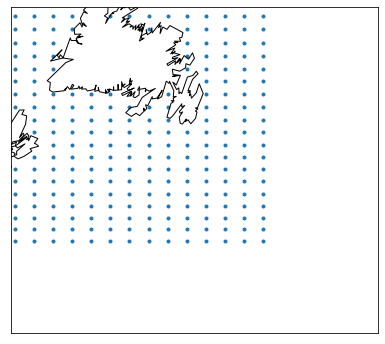

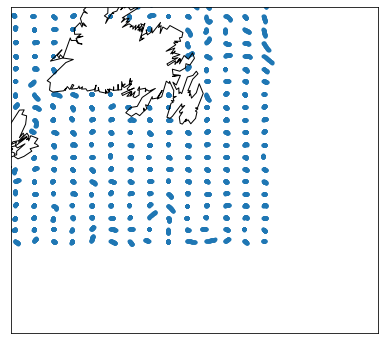

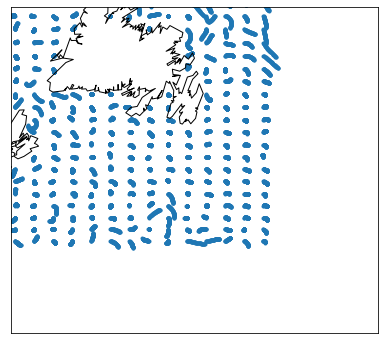

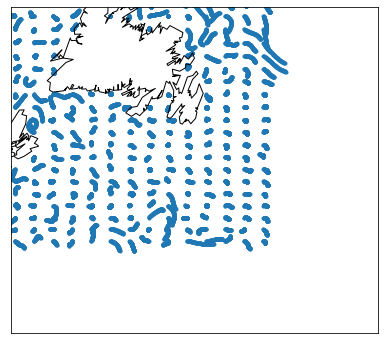

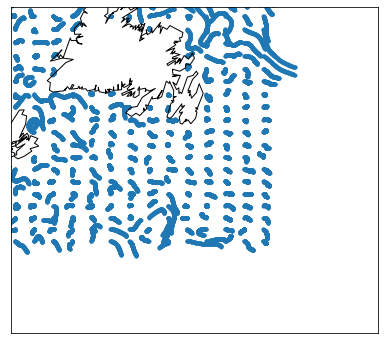

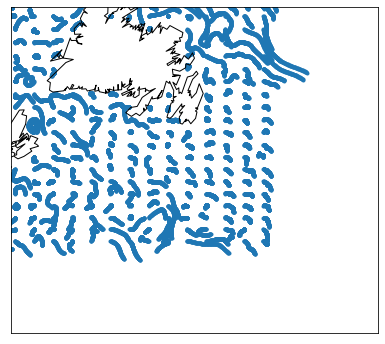

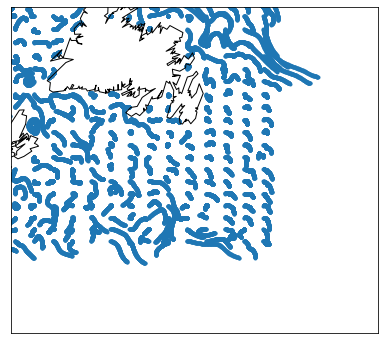

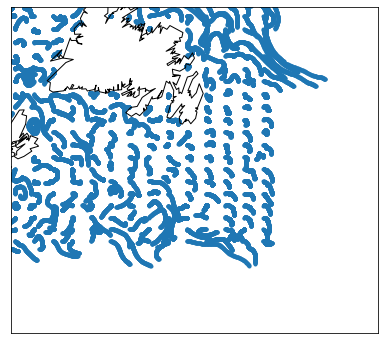

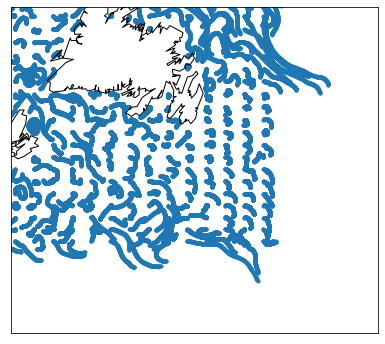

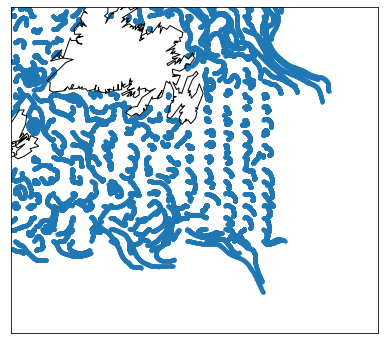

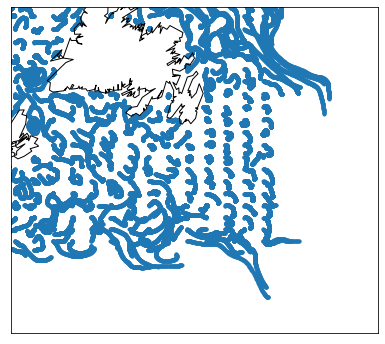

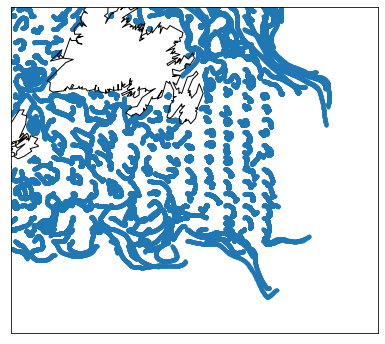

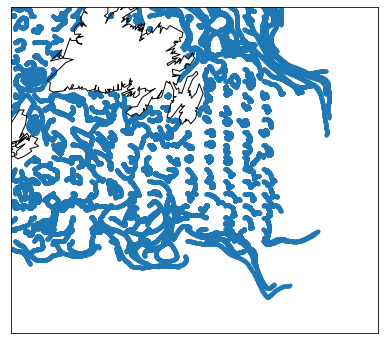

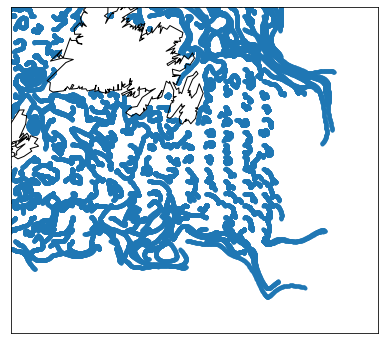

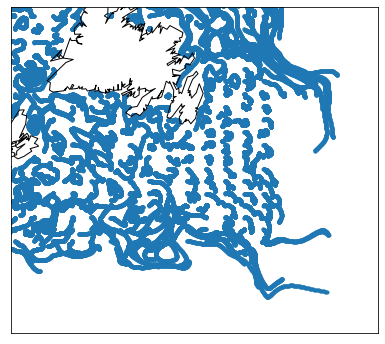

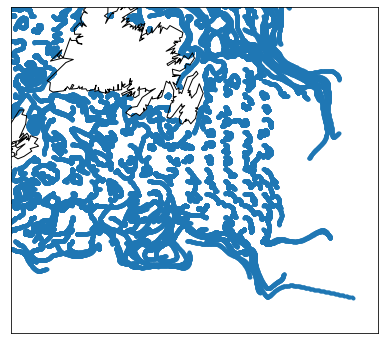

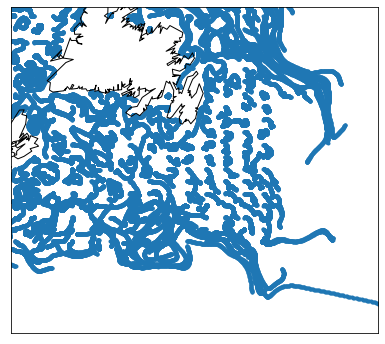

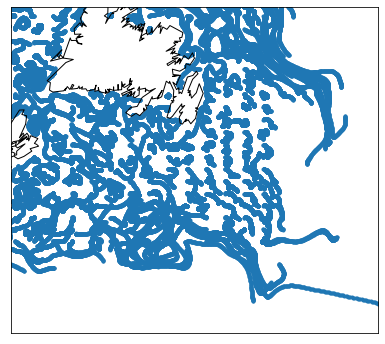

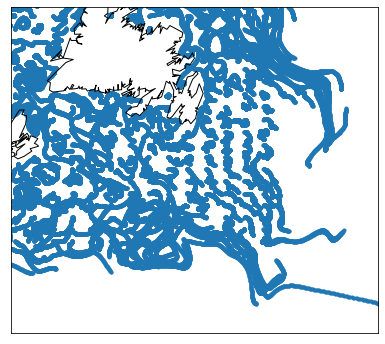

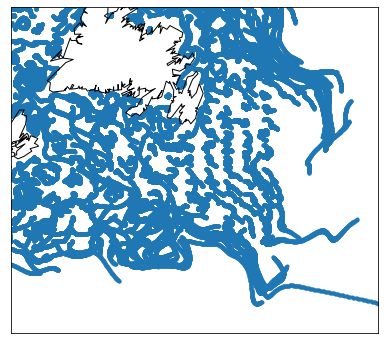

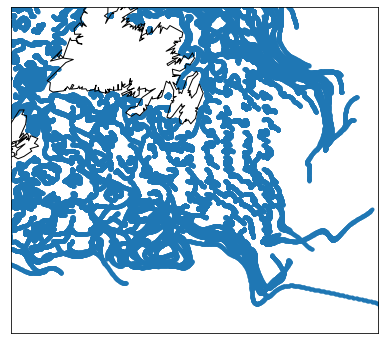

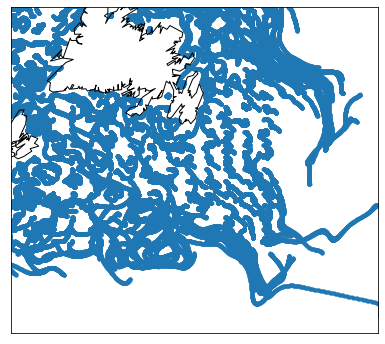

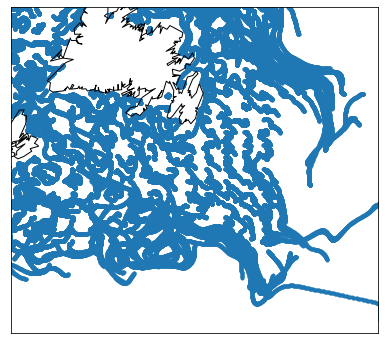

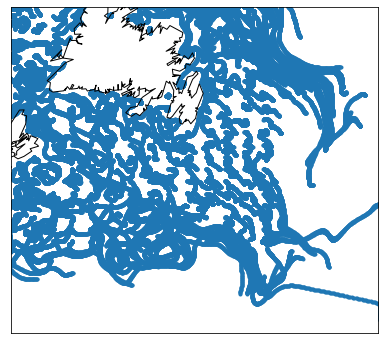

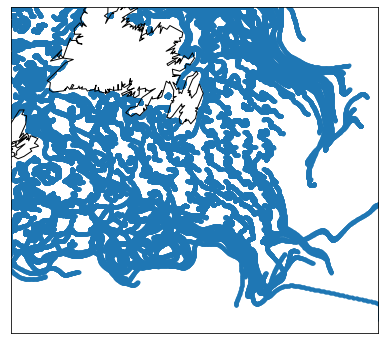

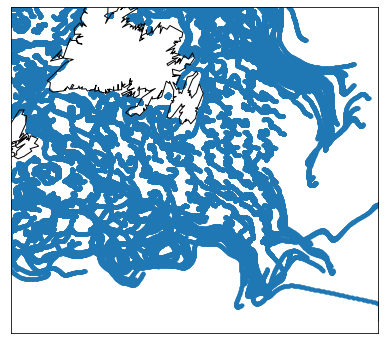

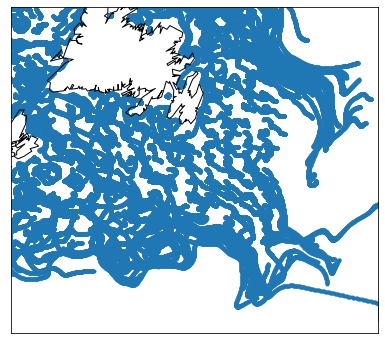

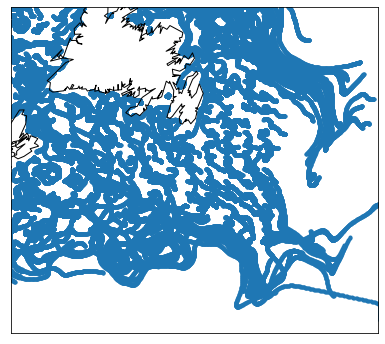

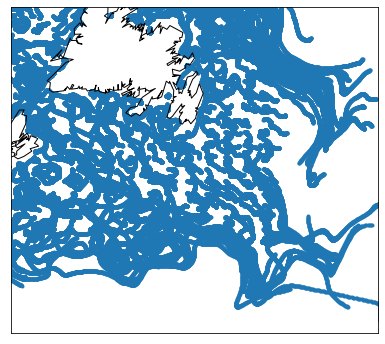

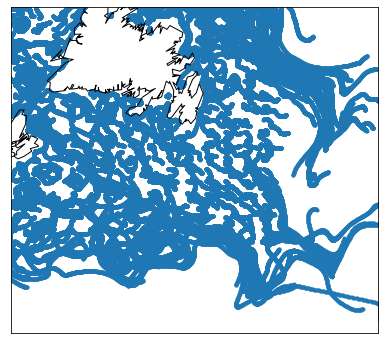

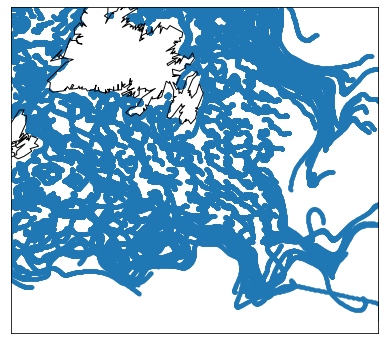

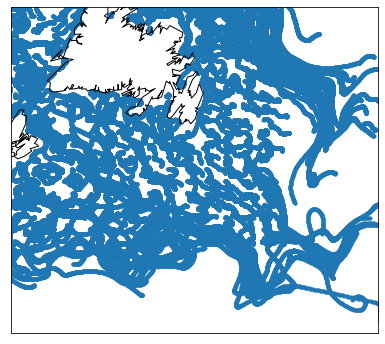

In [6]:
start=dates[0]
for n, date in enumerate(dates):
    fig,ax = plt.subplots(1,1, figsize=(10,6))
    m = Basemap(projection='merc',llcrnrlat=40,urcrnrlat=50,llcrnrlon=-61,urcrnrlon=-45,resolution='l')
    lat_run1 = run1.sel(time=slice(start,date)).lat.values
    lon_run1 = run1.sel(time=slice(start,date)).lon.values
    plot_Scatter(m,lat_run1,lon_run1)


# Identify indices of constant particles

In [7]:
inds_lon = np.where(run1.lon.diff('time')==0)
inds_lat = np.where(run1.lat.diff('time')==0)

In [8]:
unique_lons = np.unique(inds_lon[0])
unique_lats = np.unique(inds_lat[0])
print(unique_lons)
print(unique_lats)

[  0   1   3   4  19  21  23  24  27  29  30  37  53  54  57  60  61  68
  72  73  74  84  86  93  94  96 101 114 115 131 132 134 137 140 149 152
 155 160 161 162 163 166 170 174 181 189 190 191 194 196 201 202 203 213
 215 216 219 220 224 230 231 233 234 235 241 244 247 250 254 255 256 260
 261 262 264 267 268 274 276 280 281 287 294 295 296 297 310 311 312 313
 314 315 320 323 324 326 327 328 329 330 333 338 340 341 346 351 354 355
 358 359 360 361 364 365 366 367 369 370 371 378 383 384]
[  0   4   5   6   8  17  20  21  22  26  30  33  34  36  50  53  54  57
  58  65  67  69  71  73  74  78  83  86  90  91  93  95  96  97  98  99
 101 102 104 107 114 123 126 127 128 131 133 136 138 140 142 143 146 155
 156 160 161 165 167 168 169 170 172 173 174 176 178 179 182 187 189 192
 193 194 195 197 200 201 202 203 205 210 212 213 215 216 218 220 223 224
 230 231 237 240 245 247 250 251 252 253 255 257 258 260 261 264 265 266
 267 268 276 278 280 281 282 285 293 294 295 296 297 302 306 307 3

Stationary means both lats and lons are not changing so find intersection

In [9]:
intersect = np.intersect1d(unique_lons, unique_lats)
print(intersect)

[  0   4  21  30  53  54  57  73  74  86  93  96 101 114 131 140 155 160
 161 170 174 189 194 201 202 203 213 215 216 220 224 230 231 247 250 255
 260 261 264 267 268 276 280 281 294 295 296 297 310 311 312 313 314 315
 320 324 326 327 328 329 330 338 340 351 354 355 359 360 361 366 369 370
 371 378]


Times also need to be identical for stationarity

In [10]:
def index_times(inds_lon, inds_lat, particle):
    positions_lon = np.where(inds_lon[0] == particle)
    times_lons = inds_lon[1][positions_lon]
    positions_lat = np.where(inds_lat[0] == particle)
    times_lats = inds_lat[1][positions_lat]
    return times_lons, times_lats

Identify truly stationart partilces and the times


In [11]:
stationary = {}
for i in intersect:
    times_lons, times_lats = index_times(inds_lon, inds_lat, i)
    times_intersect = np.intersect1d(times_lons, times_lats)
    if times_intersect.size>0:
        stationary[i] = times_intersect
print(len(stationary.keys()))
print(stationary.keys())

48
dict_keys([30, 53, 54, 74, 96, 101, 114, 131, 160, 174, 194, 213, 215, 224, 230, 231, 247, 250, 255, 260, 261, 267, 268, 280, 281, 294, 295, 296, 297, 310, 311, 312, 313, 314, 315, 320, 328, 329, 330, 340, 351, 359, 360, 361, 369, 370, 371, 378])


/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


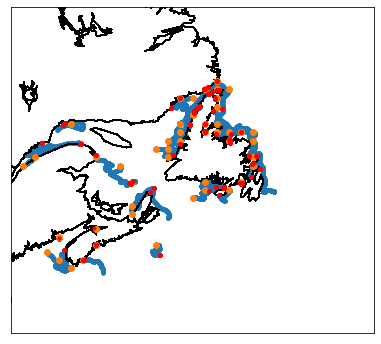

In [12]:
fig,ax = plt.subplots(1,1, figsize=(10,6))
m = Basemap(projection='merc',llcrnrlat=40,urcrnrlat=55,llcrnrlon=-70,urcrnrlon=-45,resolution='l')
for i in stationary:
    times = stationary[i]
    particle=i
    lat_particle = run1.lat.values[particle,:]
    lon_particle = run1.lon.values[particle,:]
    plot_Scatter(m,lat_particle,lon_particle)
    plot_Scatter(m,lat_particle[0],lon_particle[0],'C1o',zorder=2)
    for t in times:
        plot_Scatter(m,lat_particle[t],lon_particle[t], 'r.',zorder=10)

Red dots are where the particles are stationary, orange where they were released and blue is the rest of the trajectory.

/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


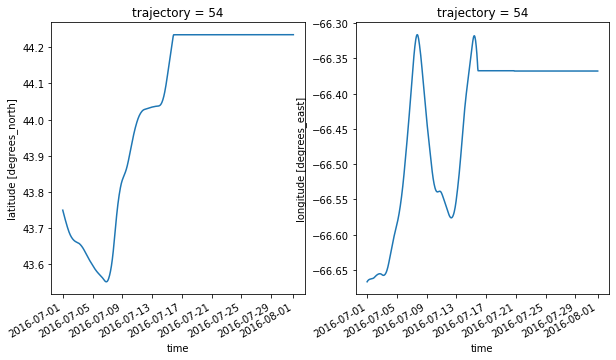

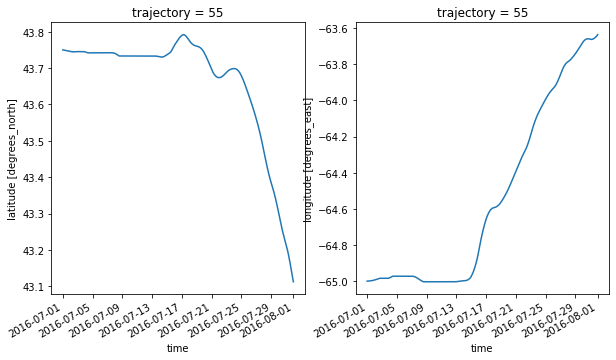

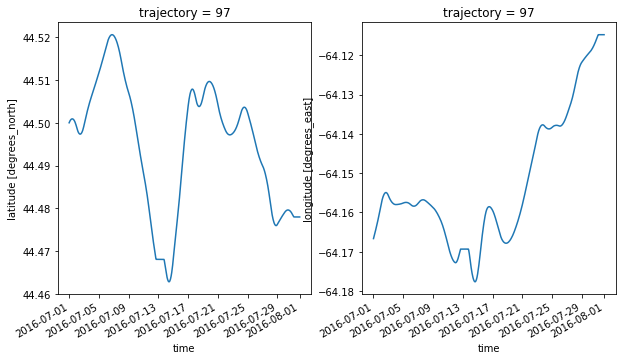

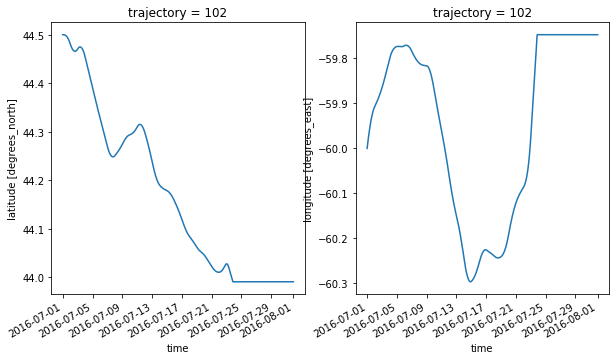

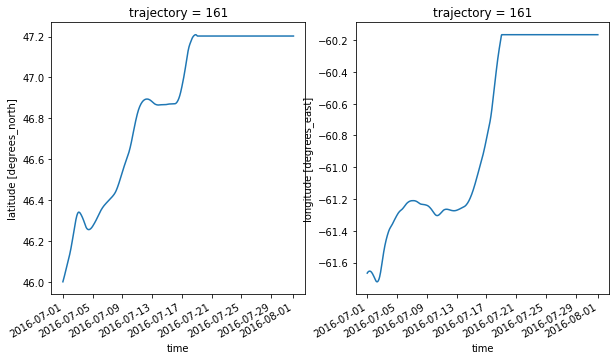

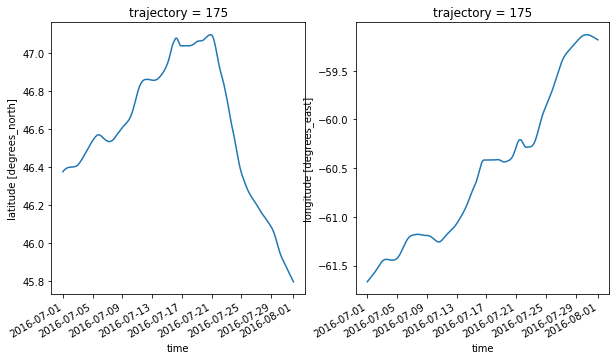

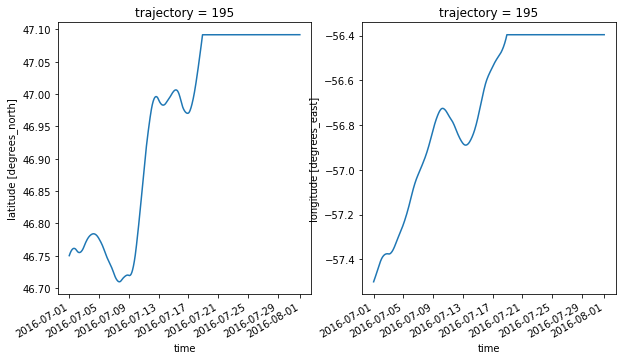

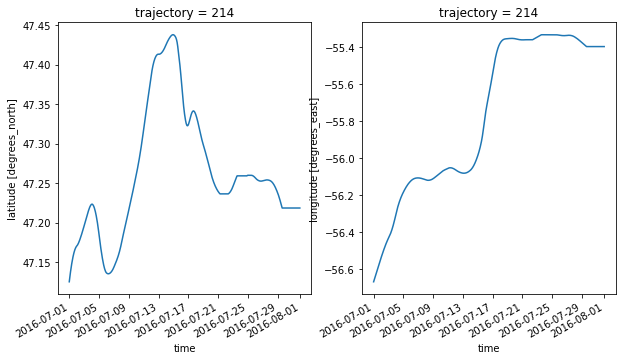

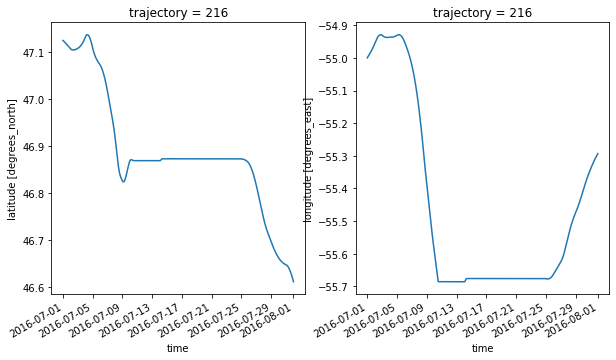

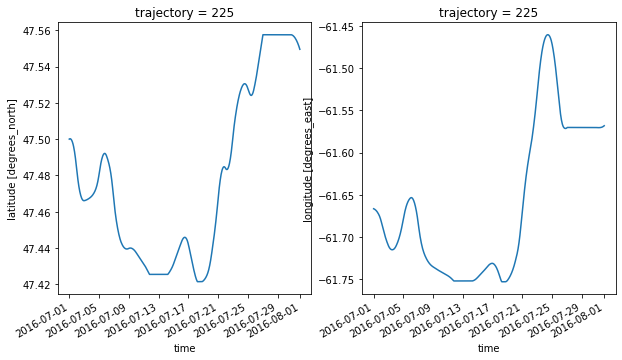

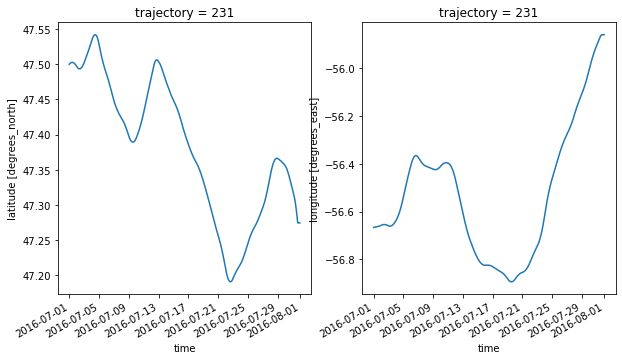

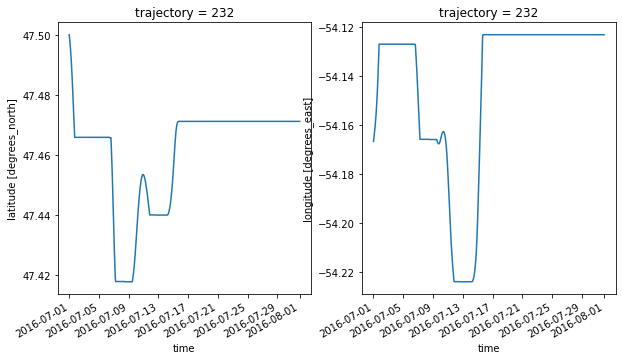

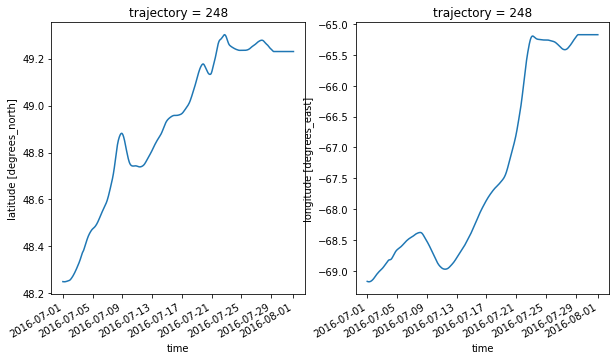

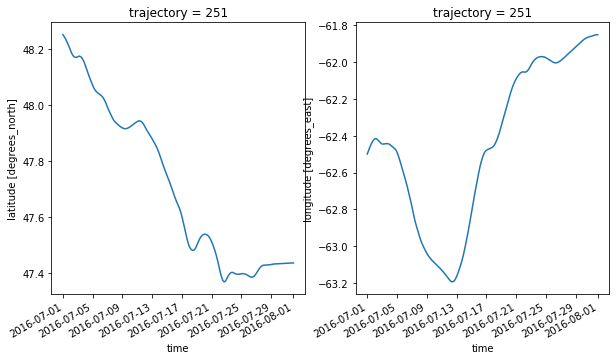

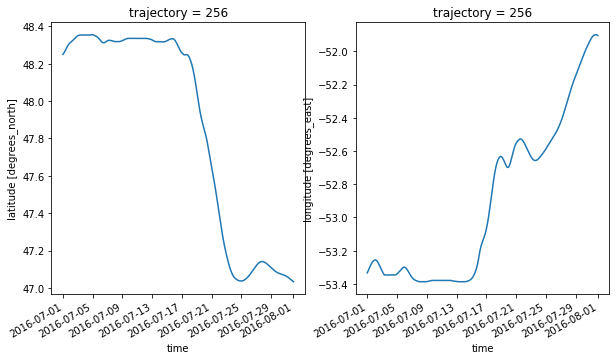

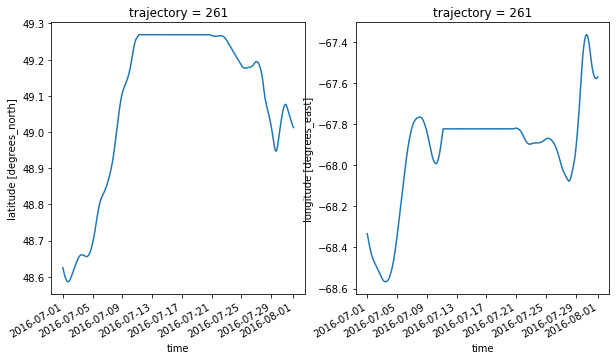

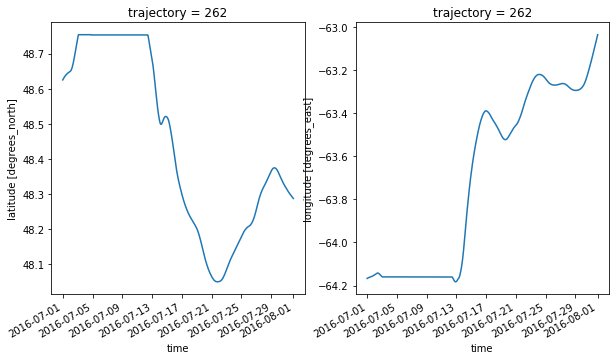

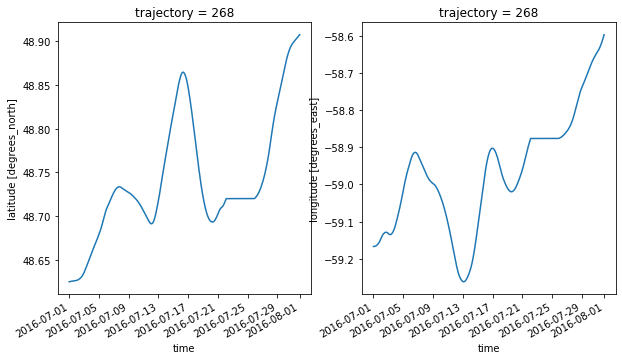

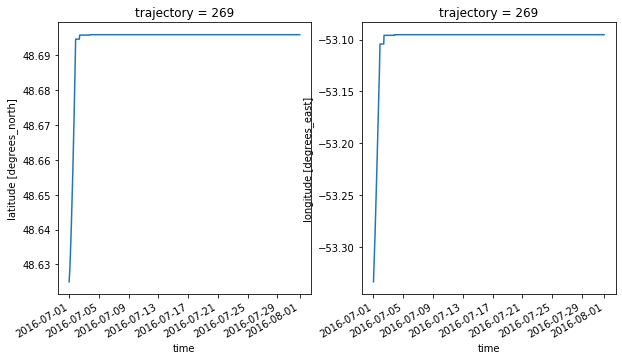

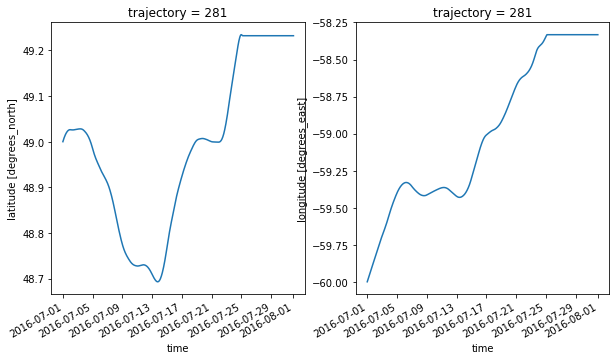

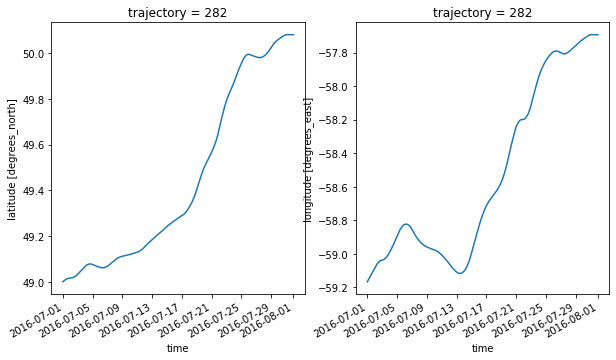

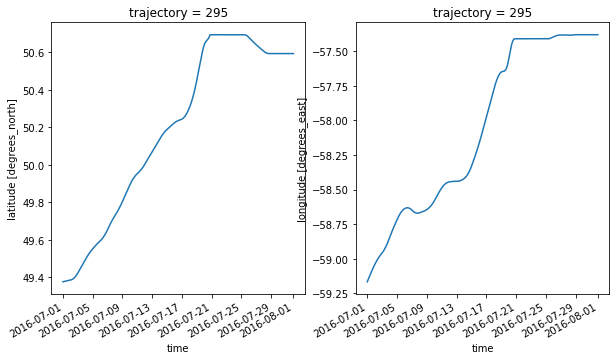

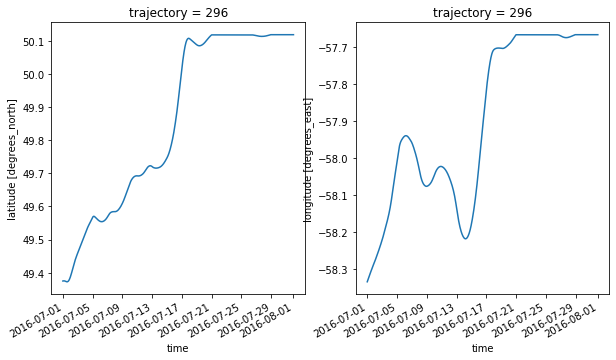

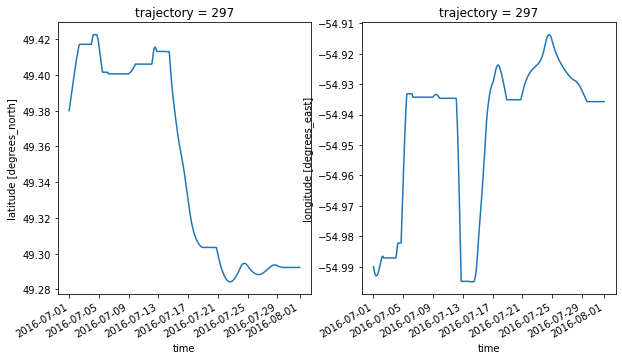

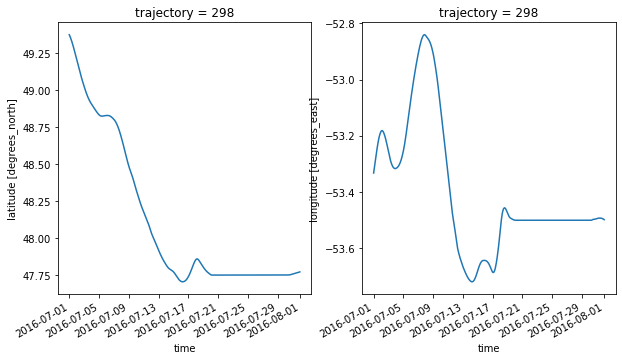

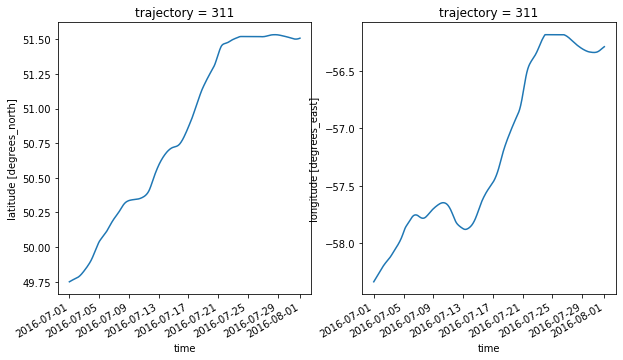

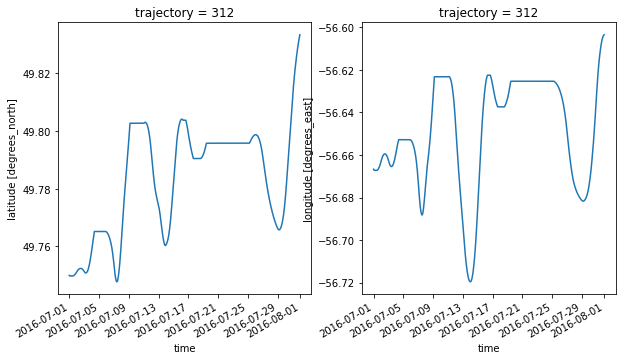

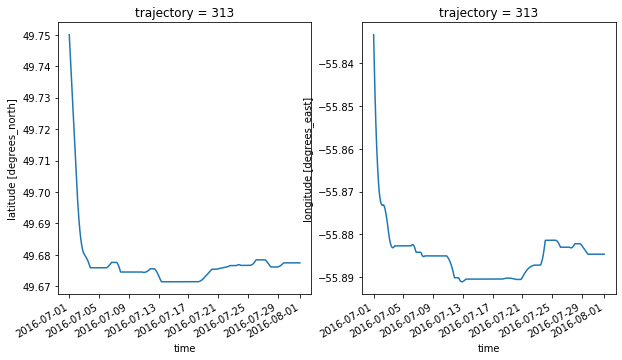

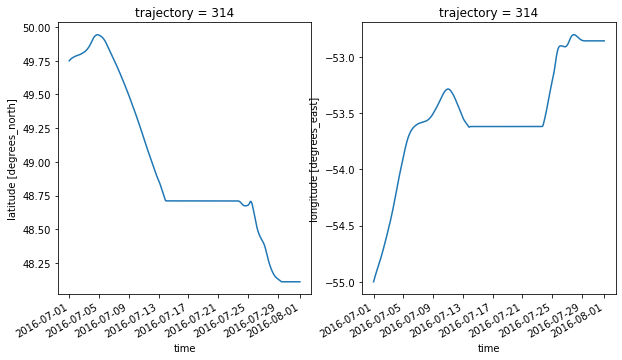

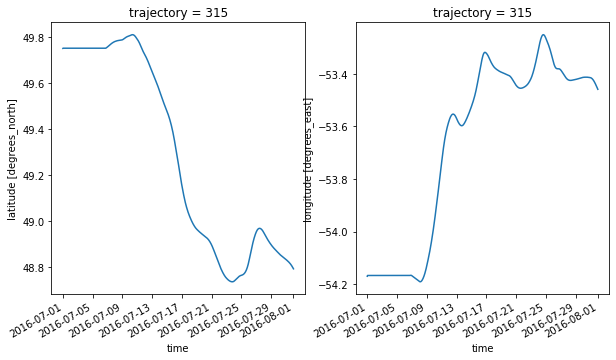

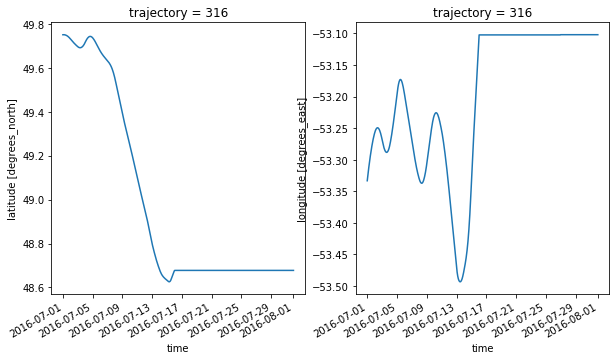

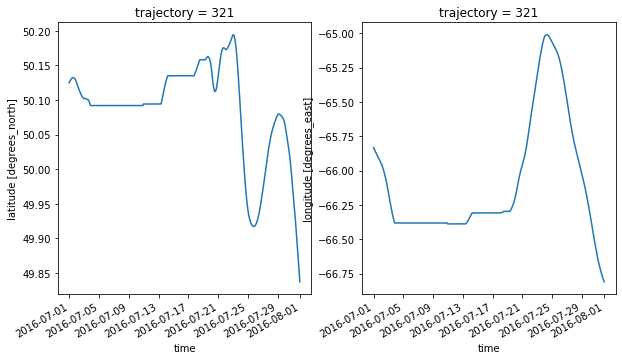

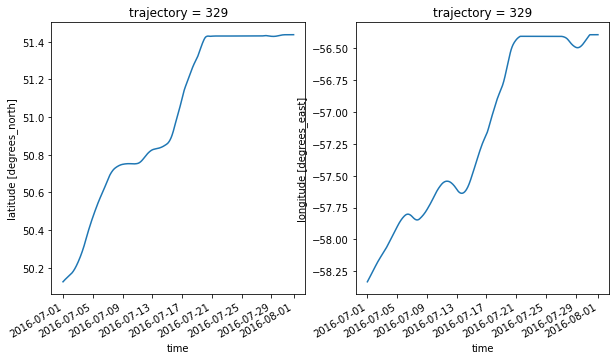

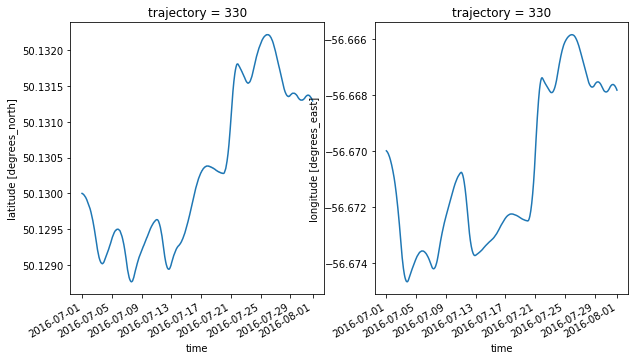

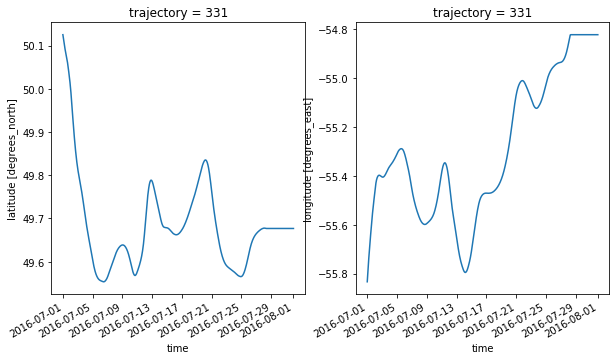

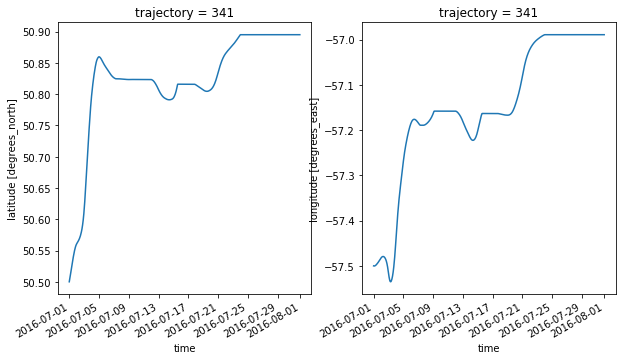

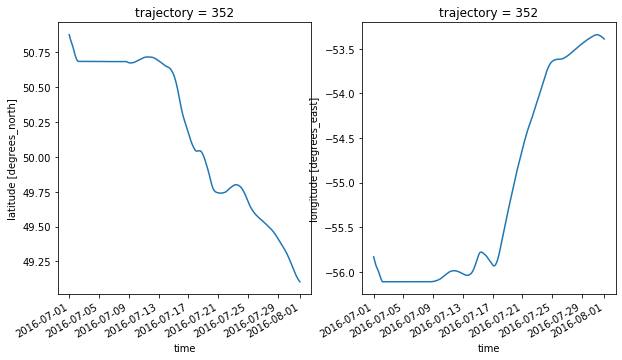

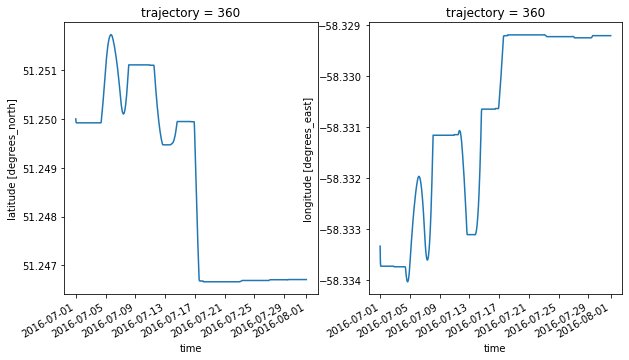

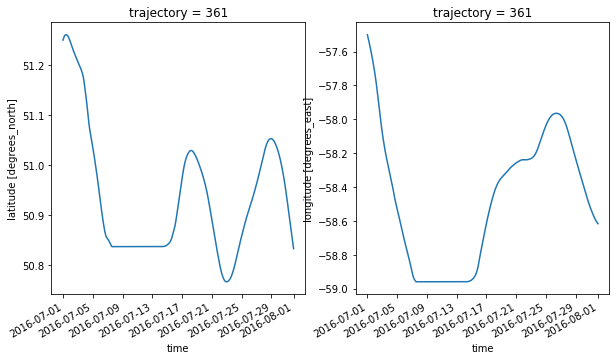

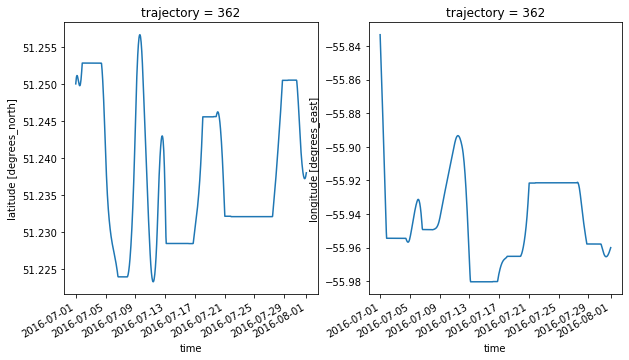

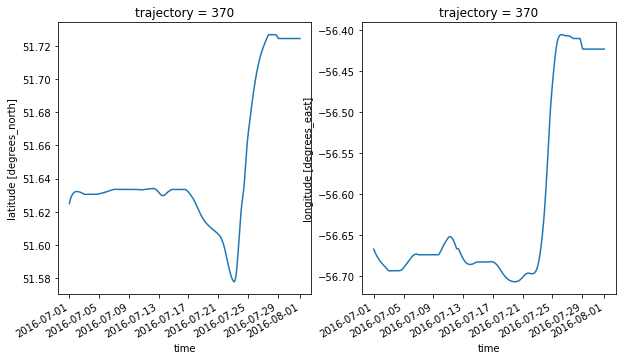

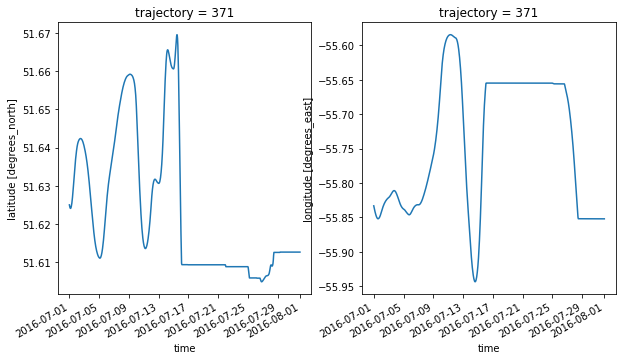

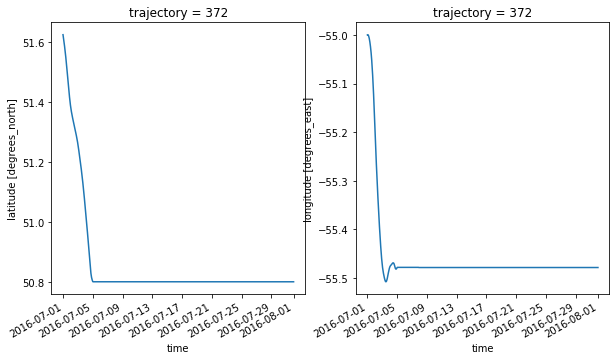

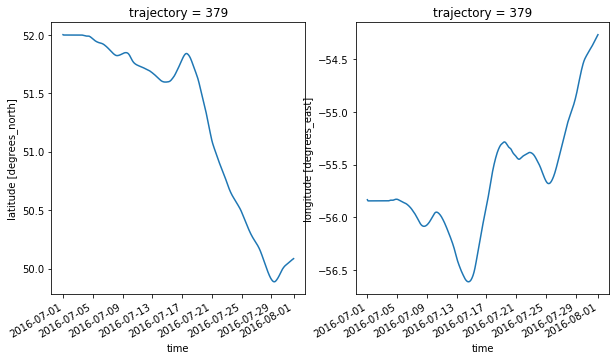

In [13]:
for i in stationary:
    times = stationary[i]
    if times.size > 1:
        fig, axs = plt.subplots(1,2,figsize=(10,5))
        # +1 for xarray
        run1.lat.sel(trajectory=i+1).plot(ax=axs[0])
        run1.lon.sel(trajectory=i+1).plot(ax=axs[1])

There is one particle in the middle of the ocean that appears to be stationary at times. How could that be? Sable Island ( 43.9337° N, 59.9149 ) is about in that location - Compare against the lats/lons of the 4th particle in the list of stationaries

In [14]:
run1.lon.values[101,:]

array([-60.      , -59.99391 , -59.98802 , -59.98233 , -59.97684 ,
       -59.971546, -59.966446, -59.96153 , -59.956806, -59.952274,
       -59.947933, -59.943787, -59.939835, -59.936073, -59.93251 ,
       -59.92914 , -59.925964, -59.92299 , -59.92021 , -59.917637,
       -59.915264, -59.913097, -59.911148, -59.909416, -59.90791 ,
       -59.90649 , -59.90503 , -59.903534, -59.90201 , -59.900463,
       -59.89889 , -59.897293, -59.895668, -59.894012, -59.892334,
       -59.890625, -59.88889 , -59.88712 , -59.88532 , -59.883488,
       -59.88162 , -59.879715, -59.877773, -59.87579 , -59.87377 ,
       -59.871708, -59.869606, -59.86746 , -59.86527 , -59.86303 ,
       -59.860725, -59.858364, -59.85595 , -59.853485, -59.850967,
       -59.8484  , -59.84579 , -59.843147, -59.840466, -59.837757,
       -59.835022, -59.832264, -59.829483, -59.82669 , -59.823883,
       -59.821075, -59.818264, -59.815453, -59.812653, -59.809875,
       -59.807137, -59.804443, -59.801796, -59.799248, -59.796

In [15]:
run1.lat.values[101,:]

array([44.5     , 44.500053, 44.50007 , 44.500046, 44.499977, 44.49986 ,
       44.499676, 44.499428, 44.499104, 44.498703, 44.498226, 44.49767 ,
       44.497025, 44.49629 , 44.495457, 44.49453 , 44.4935  , 44.49237 ,
       44.491135, 44.48979 , 44.488342, 44.486782, 44.485096, 44.48329 ,
       44.48136 , 44.479435, 44.47764 , 44.475967, 44.474426, 44.473007,
       44.471718, 44.47056 , 44.469524, 44.468624, 44.467846, 44.467194,
       44.466667, 44.46627 , 44.466   , 44.465855, 44.46584 , 44.465954,
       44.4662  , 44.46658 , 44.467094, 44.467743, 44.468536, 44.469467,
       44.47053 , 44.471584, 44.472485, 44.473236, 44.473843, 44.474297,
       44.474606, 44.474773, 44.474796, 44.474674, 44.47441 , 44.474007,
       44.473457, 44.472767, 44.47193 , 44.47095 , 44.46982 , 44.468525,
       44.467068, 44.465446, 44.463654, 44.46169 , 44.459538, 44.457203,
       44.45468 , 44.45205 , 44.4494  , 44.446743, 44.444073, 44.4414  ,
       44.438725, 44.436047, 44.433372, 44.430702, 

Stationary particles stops around 43.990433, -59.747143 so yes, I think that Open Drift is detecting Sable Island as land.... This might be a major difference between using basemap vs ocean model mask to determine land. It really depends on how the ocean model mask file treats the islands...